In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [3]:
#Q2(a)
srs_Q = pd.Series([80,150,135,165,95,130,110])
srs_L = pd.Series([60,100,100,120,70,90,80])
srs_K = pd.Series([50,100,80,100,60,80,70])
df = pd.DataFrame({'Output Q': srs_Q, 'Labour L': srs_L, 'Capital K': srs_K})
df

,Output Q,Labour L,Capital K
0,80,60,50
1,150,100,100
2,135,100,80
3,165,120,100
4,95,70,60
5,130,90,80
6,110,80,70


In [4]:
s = pd.Series(["B","C","D","E","F","G","H"])
df.set_index([s])

,Output Q,Labour L,Capital K
B,80,60,50
C,150,100,100
D,135,100,80
E,165,120,100
F,95,70,60
G,130,90,80
H,110,80,70


In [5]:
StatTable = df.agg([np.mean,np.var,np.std,np.median])
StatTable  

,Output Q,Labour L,Capital K
mean,123.571429,88.571429,77.142857
var,914.285714,414.285714,357.142857
std,30.237158,20.354010,18.898224
median,130.000000,90.000000,80.000000


In [6]:
#Q2(b)
dft=df.transpose()
dft.columns = ["B","C","D","E","F","G","H"]
dft

,B,C,D,E,F,G,H
Output Q,80,150,135,165,95,130,110
Labour L,60,100,100,120,70,90,80
Capital K,50,100,80,100,60,80,70


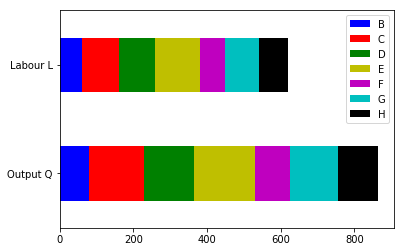

In [7]:
my_colors = ['b', 'r', 'g', 'y', 'm', 'c','k']
dft1=dft.drop(["Capital K"])
ax = dft1.plot.barh(
stacked = True ,
color = my_colors)


In [8]:
#Q2(c)
k = df["Capital K"]. apply(np.log)
q = df["Output Q"]. apply(np.log)
l = df["Labour L"]. apply(np.log)
df2 = pd.DataFrame({'LogQ': q, 'LogL': l, 'LogK': k})
df2.set_index([s])

,LogQ,LogL,LogK
B,4.382027,4.094345,3.912023
C,5.010635,4.605170,4.605170
D,4.905275,4.605170,4.382027
E,5.105945,4.787492,4.605170
F,4.553877,4.248495,4.094345
G,4.867534,4.499810,4.382027
H,4.700480,4.382027,4.248495


In [9]:
#Q2(d)
model = smf.ols(formula='LogQ ~ LogL + LogK', data=df2)
results_formula = model.fit()
results_formula.params

Intercept    0.146233
LogL         0.548427
LogK         0.508741
dtype: float64

In [16]:
#l plus k approximately equals to 1. That indicates a constant returns to scale model is reasonable. 
#In economic theory it's assumed that if all inputs are multiplied by t then output is multiplied by t. 

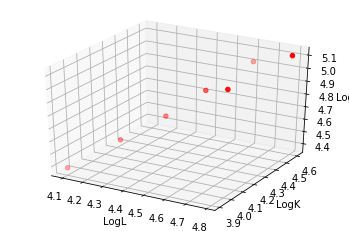

In [13]:
#Q2(e)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =l
y =k
z =q

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('LogL')
ax.set_ylabel('LogK')
ax.set_zlabel('LogQ')

plt.show()

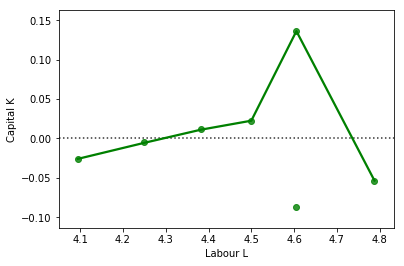

In [14]:
sns.residplot(l, k, lowess=True, color="g")

In [18]:
X = df2[['LogL','LogK']]
Y = df2['LogQ']

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()


print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   LogQ   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     958.4
Date:                Thu, 16 May 2019   Prob (F-statistic):           4.34e-06
Time:                        23:20:13   Log-Likelihood:                 21.712
No. Observations:                   7   AIC:                            -37.42
Df Residuals:                       4   BIC:                            -37.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1462      0.114      1.282      0.2

C:\Users\mtan6046\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\mtan6046\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


In [19]:
Y1 = regr.predict(X)
residuals = Y - Y1 
plt.scatter(residuals, Y1)

NameError: name 'regr' is not defined

In [15]:
#Q2(f)
print(results_formula.summary())

                            OLS Regression Results                            
Dep. Variable:                   LogQ   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     958.4
Date:                Thu, 16 May 2019   Prob (F-statistic):           4.34e-06
Time:                        22:35:24   Log-Likelihood:                 21.712
No. Observations:                   7   AIC:                            -37.42
Df Residuals:                       4   BIC:                            -37.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1462      0.114      1.282      0.2

C:\Users\mtan6046\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)
